In [18]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
image_dir = r"C:\Users\admin\Downloads\Banana FCN\Banana FCN\Images"
mask_dir = r"C:\Users\admin\Downloads\Banana FCN\Banana FCN\Mask"
image_datagen = ImageDataGenerator(rescale=1./255)
mask_datagen = ImageDataGenerator(rescale=1./255)
image_generator = image_datagen.flow_from_directory(
    image_dir,
    class_mode=None,
    color_mode='rgb',
    target_size=(128, 128),
    batch_size=32,
    seed=42
)
mask_generator = mask_datagen.flow_from_directory(
    mask_dir,
    class_mode=None,
    color_mode='grayscale',
    target_size=(128, 128),
    batch_size=32,
    seed=42
)
train_generator = zip(image_generator, mask_generator)

Found 82 images belonging to 1 classes.
Found 82 images belonging to 1 classes.


In [20]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Conv2DTranspose, Input
from tensorflow.keras.models import Model
def build_fcnn():
    inputs = Input((128, 128, 3))
    conv1 = Conv2D(128, (3, 3), activation='relu', padding='same')(inputs)
    pool1 = MaxPooling2D((2, 2))(conv1)
    conv2 = Conv2D(256, (3, 3), activation='relu', padding='same')(pool1)
    pool2 = MaxPooling2D((2, 2))(conv2)
    conv3 = Conv2D(256, (3, 3), activation='relu', padding='same')(pool2)
    up1 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(conv3)
    conv4 = Conv2D(128, (3, 3), activation='relu', padding='same')(up1)
    up2 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(conv4)
    outputs = Conv2D(1, (1, 1), activation='sigmoid', padding='same')(up2)
    model = Model(inputs, outputs)
    return model
model = build_fcnn()
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 128, 128, 128)       │           3,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 64, 64, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 64, 64, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 32, 32, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 32, 32, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_4 (Conv2DTranspose) │ (None, 64, 64, 128)         │         131,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 64, 64, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_5 (Conv2DTranspose) │ (None, 128, 128, 64)        │          32,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_20 (Conv2D)                   │ (None, 128, 128, 1)         │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,200,513 (4.58 MB)

 Trainable params: 1,200,513 (4.58 MB)

 Non-trainable params: 0 (0.00 B)

In [22]:
def combined_generator(image_gen, mask_gen):
    while True:  # Keep yielding data indefinitely
        img_batch = next(image_gen)
        mask_batch = next(mask_gen)
        yield img_batch, mask_batch  # Keras expects (input, target)
train_generator = combined_generator(image_generator, mask_generator)
model.fit(train_generator, steps_per_epoch=len(image_generator), epochs=50)

Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.4514 - loss: 0.6837
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.6834 - loss: 0.6042
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - accuracy: 0.6881 - loss: 0.5695
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - accuracy: 0.6818 - loss: 0.5505
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.6803 - loss: 0.5495
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - accuracy: 0.6850 - loss: 0.5711
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - accuracy: 0.6727 - loss: 0.5494
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - accuracy: 0.6336 - loss: 0.5341
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.6216 - loss: 0.5199
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.6225 - loss: 0.5121
Epoch 11/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - accuracy: 0.6385 - loss: 0.5029
Epoch 12/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - accuracy: 0.6326 - loss: 0.5130
Epoch 13/50
3/3 ━━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


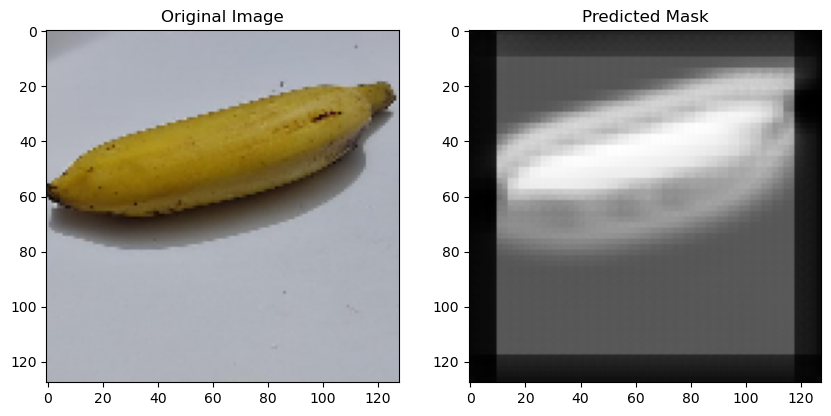

In [23]:
import matplotlib.pyplot as plt
import numpy as np
sample_image = image_generator[0][0]
predicted_mask = model.predict(np.expand_dims(sample_image, axis=0))[0]
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(sample_image)
plt.subplot(1, 2, 2)
plt.title("Predicted Mask")
plt.imshow(predicted_mask.squeeze(), cmap='gray')
plt.show()